In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import os

from keras.layers.core import Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
#path dove si trova il dataframe hmdb51
path = Path.cwd()
print(path)

c:\Users\giorg\OneDrive - Università degli Studi di Milano-Bicocca\Laurea Magistrale - Data Science\directory_progetti\deep-learning-video-classification


Testing if cuda is on GPU

In [12]:
if tf.test.gpu_device_name(): 
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
   print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


()


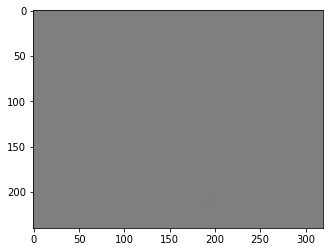

In [28]:
img_opt = tf.io.read_file("C:/Users/giorg/OneDrive - Università degli Studi di Milano-Bicocca/Laurea Magistrale - Data Science/directory_progetti/deep-learning-video-classification/data/hmdb51/rawframes/brush_hair/April_09_brush_hair_u_nm_np1_ba_goo_0/flow_x_00001.jpg")
print(img_opt.shape)
img_opt = tf.image.decode_jpeg(img_opt, channels=3)
plt.imshow(img_opt)

#### Augmentation 1 frame

In [2]:
import zipfile
from shutil import copyfile
from time import time
import random as python_random
import zipfile
import pickle

In [3]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.15),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
    layers.Resizing(224,224)
])

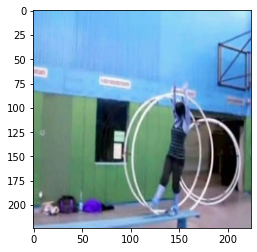

In [81]:
img = cv2.imread("C:/Users/Ale/Desktop/Uni/Magistrale/Secondo semestre/Deep Learning/Progetto/hmdb51/rawframes/train/cartwheel/(Rad)Schlag_die_Bank!_cartwheel_f_cm_np1_le_med_0.avi/(Rad)Schlag_die_Bank!_cartwheel_f_cm_np1_le_med_0.avi_frame_1.jpg")
img = tf.expand_dims(img, 0)
plt.imshow(img[0])

(-0.5, 223.5, 223.5, -0.5)

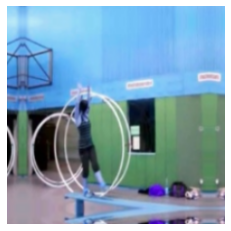

In [253]:
augmented_image = data_augmentation(img)
plt.imshow(augmented_image[0].numpy().astype("uint8"))
plt.axis("off")

In [100]:
augmented_image.shape

TensorShape([1, 224, 224, 3])

### Augmentation + frames ?

In [9]:
print(os.path.join(path, 'data\\test\\train'))

c:\Users\giorg\OneDrive - Università degli Studi di Milano-Bicocca\Laurea Magistrale - Data Science\directory_progetti\deep-learning-video-classification\data\test\train


In [10]:
image_datagen = keras.preprocessing.image.ImageDataGenerator(zoom_range = 0.2, 
                                   rotation_range = 45,
                                   horizontal_flip = True)
#image_datagen.fit(train_dataset, augment=True)
train_generator = image_datagen.flow_from_directory(os.path.join(path, 'data\\test\\test'), batch_size = 8)

Found 1436 images belonging to 3 classes.


In [ ]:
model.fit_generator(train_generator, steps_per_epoch=1500, epochs=10, validation_data = val_dataset)

# CNN PAPER GIO, GUARDA DA QUA IN GIù


In [3]:
train_dataset = keras.preprocessing.image_dataset_from_directory(os.path.join(path, 'data\\test\\train'),
                                                            image_size=(224,224),
                                                            color_mode='rgb',
                                                            batch_size=16,
                                                            label_mode='categorical',
                                                            seed=1)

Found 1436 files belonging to 3 classes.


In [4]:
val_dataset = keras.preprocessing.image_dataset_from_directory(os.path.join(path, 'data\\test\\test'),
                                                            image_size=(224,224),
                                                            color_mode='rgb',
                                                            batch_size= 16,
                                                            label_mode='categorical',
                                                            seed=1)

Found 1436 files belonging to 3 classes.


In [5]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.15),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
    layers.Resizing(224,224)
])

In [6]:
num_classes = 3

model_spat = keras.models.Sequential()

data_augmentation

model_spat.add(keras.layers.Conv2D(96, (7,7), strides = 2, input_shape=(224, 224, 3), activation = "relu"))
model_spat.add(keras.layers.BatchNormalization())
model_spat.add(keras.layers.MaxPooling2D((3,3), strides=2, padding="same"))

model_spat.add(keras.layers.ZeroPadding2D(padding = (1,1)))
model_spat.add(keras.layers.Conv2D(256, (5,5), strides = 2, activation='relu'))
model_spat.add(keras.layers.BatchNormalization())
model_spat.add(keras.layers.MaxPooling2D((3,3), strides=2, padding="same"))
          
model_spat.add(keras.layers.ZeroPadding2D(padding = (1,1)))
model_spat.add(keras.layers.Conv2D(512, (3,3), strides = 1, activation='relu'))

model_spat.add(keras.layers.ZeroPadding2D(padding = (1,1)))
model_spat.add(keras.layers.Conv2D(512, (3,3), strides = 1, activation='relu'))

model_spat.add(keras.layers.ZeroPadding2D(padding = (1,1)))
model_spat.add(keras.layers.Conv2D(512, (3,3), strides = 1, activation='relu'))
model_spat.add(keras.layers.MaxPooling2D((3,3), strides=2, padding="same"))

model_spat.add(keras.layers.Flatten())

model_spat.add(keras.layers.Dense(4096, activation='relu'))
model_spat.add(keras.layers.Dropout(0.5))      #valore dropout 0.5 oppure 0.9? paper li usa entrambi 

model_spat.add(keras.layers.Dense(2048, activation='relu'))
model_spat.add(keras.layers.Dropout(0.5))

model_spat.add(keras.layers.Softmax())

model_spat.add(keras.layers.Dense(num_classes, activation="softmax"))

In [7]:
num_classes = 3

model_mot= keras.models.Sequential()

data_augmentation

model_mot.add(keras.layers.Conv2D(96, (7,7), strides = 2, input_shape=(224, 224, 3), activation = "relu"))
model_mot.add(keras.layers.BatchNormalization())
model_mot.add(keras.layers.MaxPooling2D((3,3), strides=2, padding="same"))

model_mot.add(keras.layers.ZeroPadding2D(padding = (1,1)))
model_mot.add(keras.layers.Conv2D(256, (5,5), strides = 2, activation='relu'))
model_mot.add(keras.layers.BatchNormalization())
model_mot.add(keras.layers.MaxPooling2D((3,3), strides=2, padding="same"))
          
model_mot.add(keras.layers.ZeroPadding2D(padding = (1,1)))
model_mot.add(keras.layers.Conv2D(512, (3,3), strides = 1, activation='relu'))

model_mot.add(keras.layers.ZeroPadding2D(padding = (1,1)))
model_mot.add(keras.layers.Conv2D(512, (3,3), strides = 1, activation='relu'))

model_mot.add(keras.layers.ZeroPadding2D(padding = (1,1)))
model_mot.add(keras.layers.Conv2D(512, (3,3), strides = 1, activation='relu'))
model_mot.add(keras.layers.MaxPooling2D((3,3), strides=2, padding="same"))

model_mot.add(keras.layers.Flatten())

model_mot.add(keras.layers.Dense(4096, activation='relu'))
model_mot.add(keras.layers.Dropout(0.5))

model_mot.add(keras.layers.Dense(2048, activation='relu'))
model_mot.add(keras.layers.Dropout(0.5))

model_mot.add(keras.layers.Softmax())

model_mot.add(keras.layers.Dense(num_classes, activation="softmax"))

In [8]:
model_spat.compile(loss=keras.losses.categorical_crossentropy, metrics=['accuracy'], 
              optimizer=keras.optimizers.RMSprop(learning_rate=0.001))

In [9]:
history = model_spat.fit(train_dataset,  epochs=2, 
                    validation_data=val_dataset)

Epoch 1/2
90/90 [==============================] - 14s 87ms/step - loss: 1.0751 - accuracy: 0.4450 - val_loss: 1.0585 - val_accuracy: 0.4610
Epoch 2/2
90/90 [==============================] - 7s 79ms/step - loss: 1.0509 - accuracy: 0.4506 - val_loss: 1.0361 - val_accuracy: 0.4610


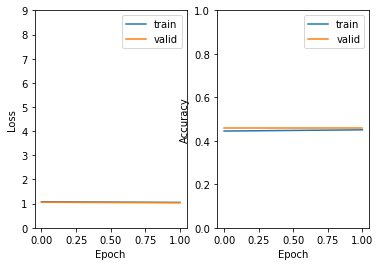

In [10]:
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim([0.0, 9.0])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'valid'])

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylim([0.0, 1.0])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'valid'])

# Optical Flow Stacking

In [ ]:
path = './data/hmdb51'
path_rowframes = './data/hmdb51/rawframes/'
path_annotations = './data/hmdb51/annotations/'

img_height = 224
img_width = 224
batch_size = 32
num_classes = 51

num_frames_desired = 10     #number of frames per clip
type_frame = 'img'          #img / flow_x / flow_y
partition = 'train'

# Gian Script

In [30]:
path = './data/hmdb51'
path_rowframes = './data/hmdb51/rawframes/'
path_annotations = './data/hmdb51/annotations/'

img_height = 224
img_width = 224
batch_size = 32
num_classes = 51

num_frames_desired = 10     #number of frames per clip
type_frame = 'img'          #img / flow_x / flow_y
partition = 'train'

In [32]:
def sampling(list, num_frames_desired):
    step = len(list) // (num_frames_desired)
    #selected_frames = list(range(0, len(list), step))[:num_frames_desired]
    sampled_list = list[0:len(list):step][:num_frames_desired]
    return(sampled_list)

def parse_image(filename):
    image = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [img_height, img_width])
    return image

def configure_for_performance(ds):
    ds = ds.shuffle(buffer_size=1000)
    ds = ds.batch(batch_size)
    ds = ds.repeat()
    ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
    return ds

def find_paths(partition, type_frame, num_frames_desired):
    if partition == 'train':
        video_list = pd.read_csv(f'{path_annotations}/hmdb51_train_split_1_rawframes.txt', sep=" ", header=None) #train
        video_list.columns = ["path", "num_frames_tot", "class"]
    elif partition == 'val':
        video_list = pd.read_csv(f'{path_annotations}/hmdb51_val_split_1_rawframes.txt', sep=" ", header=None) #test
        video_list.columns = ["path", "num_frames_tot", "class"]
    else:
        raise Exception("invalid partition")

    #temp_path = video_list.loc[0]['path'] #da togliere!!!

    paths = []
    classes = []
    for index, row in video_list.iterrows(): #da togliere [:1]
        temp_path = row['path']                    #da rimuovere il commentato
        frame_list = os.listdir(os.path.join(f'./{temp_path}'))

        frame_list_type = [i for i in frame_list if i.startswith(f'{type_frame}')]

        filename = sampling(frame_list_type, num_frames_desired)

        paths.extend([os.path.join('.\\', temp_path, file) for file in filename])
        temp = [row['class']] * 10
        classes.extend(temp)

    return(list(zip(paths, classes)))

"\ninput = tf.keras.layers.Input(shape=(img_height, img_width, 3))\n\npretrained_model = tf.keras.applications.ResNet50(include_top=False,\n                                                  input_tensor=input,\n                                                  pooling='avg',\n                                                  weights='imagenet')\npretrained_model.trainable = False\n\nresnet_model = Sequential()\nresnet_model.add(pretrained_model)\n\nresnet_model.add(Flatten())\nresnet_model.add(Dense(512, activation='relu'))\nresnet_model.add(Dense(num_classes, activation='softmax'))\n\nprint(resnet_model.summary())\nresnet_model.compile(optimizer = Adam(learning_rate=0.001), loss = 'sparse_categorical_crossentropy', metrics = ['sparse_categorical_accuracy'])\n\nhistory = resnet_model.fit(train_ds, validation_data = val_ds, epochs=5, steps_per_epoch=1000) # da aggiustare\n\n\nfig1 = plt.gcf()\nplt.plot(history.history['accuracy'])\nplt.plot(history.history['val_accuracy'])\nplt.axis(ymi

In [ ]:

# ------- create train set
filenames = find_paths(partition='train', type_frame=type_frame, num_frames_desired=num_frames_desired)

random.shuffle(filenames)

zipped = [list(t) for t in zip(*filenames)]

filenames = zipped[0]
labels = zipped[1]

filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
images_ds = filenames_ds.map(parse_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
labels_ds = tf.data.Dataset.from_tensor_slices(labels)
ds = tf.data.Dataset.zip((images_ds, labels_ds))
train_ds = configure_for_performance(ds)

In [ ]:
# ------- create val test
filenames = find_paths(partition='val', type_frame=type_frame, num_frames_desired=num_frames_desired)

random.shuffle(filenames)

zipped = [list(t) for t in zip(*filenames)]

filenames = zipped[0]
labels = zipped[1]

filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
images_ds = filenames_ds.map(parse_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
labels_ds = tf.data.Dataset.from_tensor_slices(labels)
ds = tf.data.Dataset.zip((images_ds, labels_ds))
val_ds = configure_for_performance(ds)

In [45]:
train_ds

TypeError: 'PrefetchDataset' object is not subscriptable

In [ ]:
def build_model(num_classes, img_size=224):
    input = tf.keras.layers.Input(shape=(img_size, img_size, 3))
    model = tf.keras.applications.ResNet50(include_top=False, input_tensor=input, weights="imagenet")

    # Freeze the pretrained weights
    model.trainable = False

    # Rebuild top
    x = tf.keras.layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = tf.keras.layers.BatchNormalization()(x)

    top_dropout_rate = 0.2
    x = tf.keras.layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    output = tf.keras.layers.Dense(num_classes, activation="softmax", name="pred")(x)

    # Compile
    model = tf.keras.Model(input, output, name="EfficientNet")
    model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model


model = build_model(num_classes)
model.fit(train_ds, validation_data = val_ds, batch_size=32, epochs=5, steps_per_epoch=1000)

In [ ]:
from keras.optimizers import SGD, Adam

input = tf.keras.layers.Input(shape=(img_height, img_width, 3))

pretrained_model = tf.keras.applications.ResNet50(include_top=False,
                                                  input_tensor=input,
                                                  pooling='avg',
                                                  weights='imagenet')
pretrained_model.trainable = False

resnet_model = Sequential()
resnet_model.add(pretrained_model)

resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(num_classes, activation='softmax'))

print(resnet_model.summary())

# resnet_model.compile(optimizer = Adam(learning_rate=0.000001), loss = 'sparse_categorical_crossentropy', metrics = ['sparse_categorical_accuracy'])
resnet_model.compile(optimizer= SGD(lr=0.0001, momentum=0.9), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy','sparse_categorical_accuracy'])

history = resnet_model.fit(train_ds, validation_data = val_ds, validation_steps=100, epochs=5, steps_per_epoch=1000) # da aggiustare


fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.2,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.savefig('img.png')
plt.show()